#### Prepare

In [ ]:
# Import packages
library("microbiome") # Load libraries
library("phyloseq")
library("dplyr")
library("reshape2")
library("knitr")
library("GGally")

In [2]:
# Import data
data(peerj32)
pseq <- peerj32$phyloseq    # Rename data


# Pick data subset (DI samples from Phylum Bacteroidetes)
pseq2 <- pseq %>%
         subset_taxa(Phylum == "Bacteroidetes") %>%
         subset_samples(group == "LGG")


# Z transformed abundance data
pseqz <- microbiome::transform(pseq2, "Z")

head(otu_table(pseqz))
head(sample_data(pseqz))
head(tax_table(pseqz))

Warning message in transform(x, "log10"):
“OTU table contains zeroes. Using log10(1 + x) transform.”


,sample-5,sample-6,sample-11,sample-12,sample-15,sample-16,sample-19,sample-20,sample-21,sample-22,sample-25,sample-26,sample-37,sample-38,sample-41,sample-42
Allistipes et rel.,0.8357787,1.06506828,0.09985856,-0.3316105,-0.6943500,-0.09259127,0.6227581,1.3675407,-0.25675232,0.764943153,0.3298633,0.16981532,1.046446,-1.1802901,-1.9155872,-1.83089075
Bacteroides fragilis et rel.,0.6055834,-0.43058899,-0.25550159,0.6861185,-0.5182509,-0.56392574,0.7214434,1.6247782,-0.01838643,0.423038478,-0.2301675,-0.12082155,2.073096,-0.8875684,-1.5544233,-1.55442328
Bacteroides intestinalis et rel.,0.3059146,-0.77289912,-0.56027126,-0.1205202,0.3841714,0.11328140,0.1033240,2.0530751,-1.02927699,-0.762861785,-1.1459085,-1.00477342,2.240898,0.5966092,-0.4940496,0.09328671
Bacteroides ovatus et rel.,0.7502062,-1.35151061,0.31735498,0.6693144,-0.1784982,0.66931439,0.2134363,1.3884204,-0.10381204,0.002631918,-0.6079417,-0.44554420,2.172026,-0.8137996,-1.5058282,-1.17576956
Bacteroides plebeius et rel.,0.7540404,-0.09999914,0.23038801,0.6608856,0.1400283,-0.12521364,0.1169598,1.3441885,-0.68608040,0.140028330,-0.5941889,0.14002833,2.218062,-0.9820694,-1.7387744,-1.51828385
Bacteroides splachnicus et rel.,0.7810435,-0.02106836,-0.80182573,0.1601475,0.7532487,0.58000423,-0.1756181,0.5800042,-0.90484239,0.549985748,0.1248908,0.08915431,2.355459,-1.0120650,-1.6957215,-1.36279696


,time,sex,subject,sample,group
,<int>,<fct>,<fct>,<chr>,<fct>
sample-5,1,female,S3,sample-5,LGG
sample-6,2,female,S3,sample-6,LGG
sample-11,1,female,S6,sample-11,LGG
sample-12,2,female,S6,sample-12,LGG
sample-15,1,female,S8,sample-15,LGG
sample-16,2,female,S8,sample-16,LGG


,Phylum,Family,Genus
Allistipes et rel.,Bacteroidetes,Bacteroidetes,Allistipes et rel.
Bacteroides fragilis et rel.,Bacteroidetes,Bacteroidetes,Bacteroides fragilis et rel.
Bacteroides intestinalis et rel.,Bacteroidetes,Bacteroidetes,Bacteroides intestinalis et rel.
Bacteroides ovatus et rel.,Bacteroidetes,Bacteroidetes,Bacteroides ovatus et rel.
Bacteroides plebeius et rel.,Bacteroidetes,Bacteroidetes,Bacteroides plebeius et rel.
Bacteroides splachnicus et rel.,Bacteroidetes,Bacteroidetes,Bacteroides splachnicus et rel.


#### Matrix heatmaps (without association analysis, just plotting)

Var1,Var2,value
<fct>,<fct>,<dbl>
Allistipes et rel.,sample-5,0.8357787
Bacteroides fragilis et rel.,sample-5,0.6055834
Bacteroides intestinalis et rel.,sample-5,0.3059146
Bacteroides ovatus et rel.,sample-5,0.7502062
Bacteroides plebeius et rel.,sample-5,0.7540404
Bacteroides splachnicus et rel.,sample-5,0.7810435


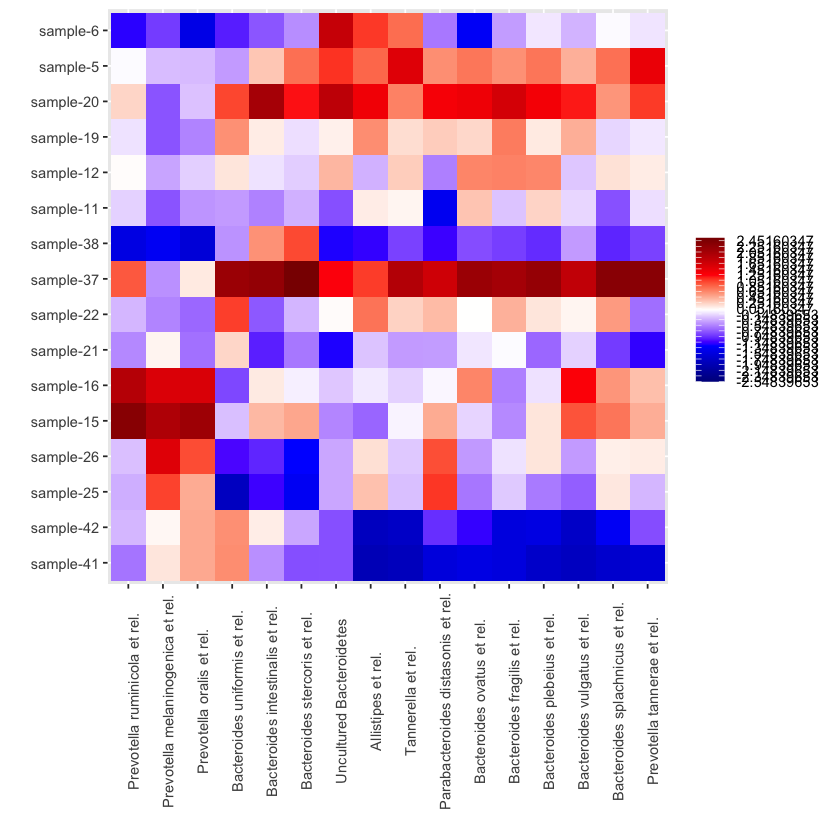

In [7]:
# Plot the abundances heatmap
pseq.melt <- melt(abundances(pseqz))
head(pseq.melt)
heat(pseq.melt, "Var1", "Var2", "value")

,sample-37,sample-20,sample-5,sample-12,sample-19,sample-22,sample-6,sample-11,sample-38,sample-21,sample-41,sample-42,sample-25,sample-26,sample-15,sample-16
Bacteroides fragilis et rel.,2.073096,1.6247782,0.6055834,0.6861185,0.72144341,0.42303848,-0.43058899,-0.25550159,-0.8875684,-0.01838643,-1.5544233,-1.5544233,-0.2301675,-0.1208215,-0.51825088,-0.56392574
Bacteroides plebeius et rel.,2.218062,1.3441885,0.7540404,0.6608856,0.11695977,0.14002833,-0.09999914,0.23038801,-0.9820694,-0.68608040,-1.7387744,-1.5182839,-0.5941889,0.1400283,0.14002833,-0.12521364
Prevotella tannerae et rel.,2.337311,1.0559962,1.4226166,0.1008615,-0.09471975,-0.65071361,-0.11527439,-0.13602387,-0.8725797,-1.18583509,-1.6326108,-0.8149697,-0.3095050,0.1008615,0.44630945,0.34827574
Uncultured Bacteroidetes,1.247422,1.8371956,1.0944009,0.3937547,0.07870197,0.02011988,1.75184462,-0.80400779,-1.2382806,-1.23828064,-0.8040078,-0.8040078,-0.3804347,-0.3804347,-0.53763449,-0.23635078
Tannerella et rel.,1.925763,0.6891905,1.5243737,0.2699386,0.17955334,0.24029748,0.80287838,0.05174195,-0.8726544,-0.43760687,-1.8556593,-1.7652741,-0.2728290,-0.2338269,-0.05025796,-0.19562901
Allistipes et rel.,1.046446,1.3675407,0.8357787,-0.3316105,0.62275809,0.76494315,1.06506828,0.09985856,-1.1802901,-0.25675232,-1.9155872,-1.8308907,0.3298633,0.1698153,-0.69435001,-0.09259127


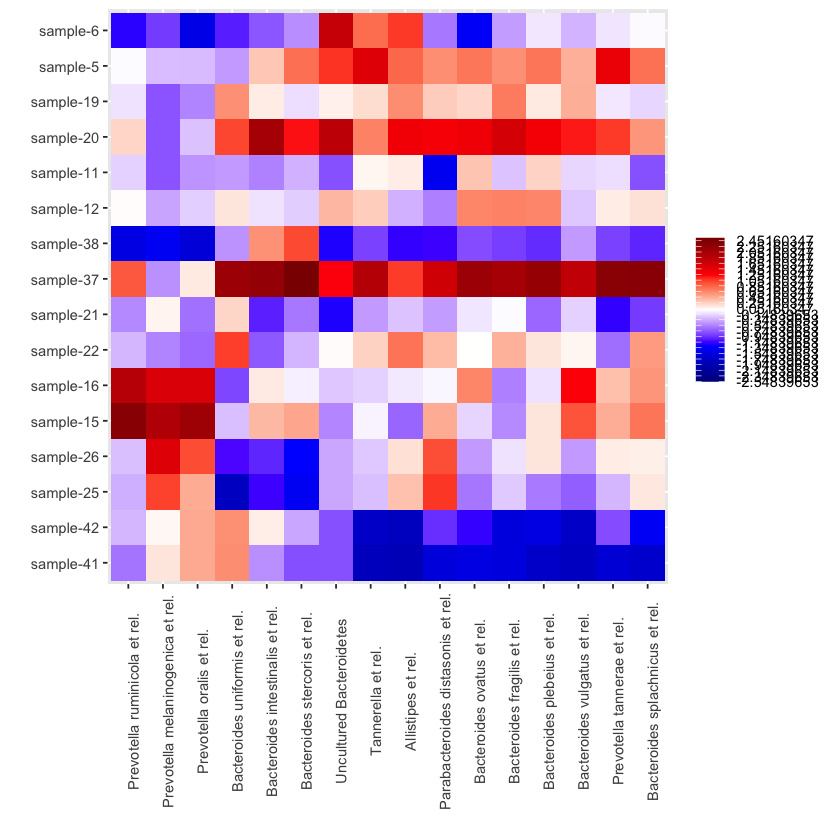

In [9]:
# Find visually appealing order for rows and columns with the Neatmap approach
# Sort the matrix rows and cols directly
xo <- neat(abundances(pseqz), method = "NMDS", distance = "euclidean") 
head(xo)
# Heatmap visualization
heat(melt(xo), "Var1", "Var2", "value")

#### Assocation tables

In [12]:
otu <- peerj32$microbes 
head(otu)
lipids <- peerj32$lipids 
head(lipids)

# Define data sets to cross-correlate
x <- log10(otu) # OTU Log10 (44 samples x 130 genera)
y <- as.matrix(lipids) # Lipids (44 samples x 389 lipids)

# Cross correlate data sets
correlations <- associate(x, y, method = "spearman", mode = "matrix", p.adj.threshold = 0.05, n.signif = 1)
kable(head(correlations))

# Or, alternatively, the same output is also available in a handy table format
correlation.table <- associate(x, y, method = "spearman", mode = "table", p.adj.threshold = 0.05, n.signif = 1)
kable(head(correlation.table))

,Actinomycetaceae,Aerococcus,Aeromonas,Akkermansia,Alcaligenes faecalis et rel.,Allistipes et rel.,Anaerobiospirillum,Anaerofustis,Anaerostipes caccae et rel.,Anaerotruncus colihominis et rel.,⋯,Uncultured Clostridiales I,Uncultured Clostridiales II,Uncultured Mollicutes,Uncultured Selenomonadaceae,Veillonella,Weissella et rel.,Vibrio,Wissella et rel.,Xanthomonadaceae,Yersinia et rel.
sample-1,60.90959,69.45161,62.82337,287.3838,61.64967,231.9970,54.96913,82.67426,422.7847,72.84016,⋯,111.76172,70.43782,62.09983,59.46011,98.84577,64.46987,67.06242,76.52020,127.63134,58.53640
sample-2,65.33758,69.01589,78.81033,248.9705,58.06942,170.2276,65.84591,92.84723,682.0491,116.95365,⋯,90.84503,78.40865,64.67782,55.26683,75.54265,68.57582,70.30753,91.98964,101.77509,70.48157
sample-3,72.30487,64.80614,74.40173,287.5267,75.19187,257.5187,57.87665,83.26439,448.3374,127.07083,⋯,111.65362,90.40823,68.51454,78.48113,124.28005,70.29313,70.91390,70.39578,92.11805,73.38401
sample-4,67.20135,56.63828,80.86422,242.5797,57.38296,279.3161,71.43065,86.60263,375.5478,151.32296,⋯,107.07809,92.59292,67.81870,59.42016,185.26701,67.51224,70.12814,65.39359,84.05262,70.21161
sample-5,58.70430,76.38979,63.53045,303.6684,56.53673,340.1269,55.98163,83.23001,591.7589,105.15929,⋯,198.21122,96.87310,139.60326,57.49885,106.30510,71.53469,71.54518,75.83735,71.38772,56.01603
sample-6,66.50112,58.12670,63.35137,479.5475,54.94863,374.8149,55.38480,87.44426,567.7555,112.43143,⋯,265.94367,85.60007,150.83860,52.52373,119.19598,79.41021,78.13185,64.64360,68.44149,64.29821


,Cer(d18:1/16:0).1,Cer(d18:1/16:0).2,Cer(d18:1/18:0),Cer(d18:1/22:0),Cer(d18:1/22:1),Cer(d18:1/24:1),Cer(d18:1/24:2),ChoE(16:0),ChoE(16:1),ChoE(18:1),⋯,TG(58:6).3,TG(58:7).1,TG(58:7).2,TG(58:7).3,TG(58:8).1,TG(58:8).2,TG(58:9),TG(60:10),TG(60:11),TG(60:9)
sample-1,-0.5528420,-0.1549020,-0.4089354,0.4899585,0.06445799,1.0813473,0.5490033,1.892484,0.41995575,1.482159,⋯,-0.080921908,0.19033170,0.1903317,0.1731863,0.004321374,0.84260924,0.54530712,-0.08618615,0.35793485,-0.3467875
sample-2,-0.4317983,-0.2076083,-0.3279021,0.4248816,0.03342376,0.9978231,0.3961993,1.613313,0.22271647,1.343212,⋯,0.004321374,0.05307844,0.1875207,0.1875207,-0.119186408,0.59328607,0.40140054,-0.27572413,0.15836249,-0.4436975
sample-3,-0.1804561,-0.1023729,-0.3098039,0.5682017,0.07188201,1.0511525,0.4698220,1.647969,-0.03151705,1.436004,⋯,-0.387216143,-0.24412514,-0.2441251,-0.2441251,-0.045757491,-0.04575749,-0.13667714,-0.60205999,-0.60205999,-0.9586073
sample-4,-0.2839967,-0.1307683,-0.4317983,0.5301997,-0.05551733,1.0269416,0.4502491,1.602169,-0.08618615,1.388279,⋯,-0.275724130,-0.10237291,-0.1023729,-0.1023729,0.075546961,0.07554696,-0.01322827,-0.56863624,-0.61978876,-0.7958800
sample-5,-0.4814861,-0.2924298,-0.3979400,0.4487063,-0.04575749,0.8909796,0.3159703,1.520615,-0.08092191,1.109241,⋯,-0.180456064,0.15533604,0.1553360,-0.2006595,-0.142667504,0.27415785,0.34044411,-0.29242982,-0.09691001,-0.4317983
sample-6,-0.3010300,-0.1487417,-0.2757241,0.4409091,0.05307844,0.9063350,0.3692159,1.517064,-0.06048075,0.966611,⋯,0.000000000,0.23552845,0.2355284,0.2355284,-0.096910013,0.52113808,0.42975228,-0.20065945,0.03742650,-0.3665315




|                                  | ChoE(19:4)| ChoE(20:4)| ChoE(20:5).2| PA(36:3)/PG(36:3).1| PA(36:3)/PG(36:3).2| PA(36:4)/PG(36:4).2| PC(36:3).2| PC(36:6).2| PC(38:4).1| PC(38:7).5|  PC(38:8e)|   PC(40:3)|  PC(40:3e)| PC(40:6).1| PC(40:7e).1| PC(40:8).1|  PC(40:8e)|   PC(42:9)|   PC(44:9)|   PE(40:1)|   PE(40:5)|  PE(40:6e)|   PS(36:1)| SM(d18:1/24:2).1| SM(d18:1/24:2).2|   TG(48:0)|   TG(50:0)|   TG(50:1)| TG(50:3).2|   TG(50:4)|   TG(51:0)| TG(51:2).3| TG(51:3).3|   TG(51:4)|   TG(51:8)|   TG(52:0)|   TG(52:1)|   TG(52:3)| TG(52:4).1|   TG(52:5)|   TG(52:6)| TG(52:8).1| TG(53:1).1| TG(53:2).1| TG(53:2).2| TG(53:3).1| TG(53:3).2| TG(53:4).2| TG(53:5).1| TG(54:1).1| TG(54:1).3|   TG(54:2)|   TG(54:3)| TG(54:4).2| TG(54:5).2| TG(54:6).1| TG(54:6).2| TG(54:7).2|   TG(54:8)|   TG(55:7)| TG(56:2).1| TG(56:2).2|   TG(56:3)| TG(56:4).3| TG(56:4).4| TG(56:5).1| TG(56:5).2| TG(56:6).2| TG(56:6).3|   TG(56:8)|   TG(56:9)|   TG(57:4)|  TG(58:10)| TG(58:6).2| TG(58:6).3| TG(58:7).1| TG(58:7



|     |X1                              |X2         | Correlation|     p.adj|
|:----|:-------------------------------|:----------|-----------:|---------:|
|1648 |Ruminococcus gnavus et rel.     |TG(54:5).2 |   0.7164958| 0.0022842|
|384  |Moraxellaceae                   |PC(40:3e)  |  -0.6941863| 0.0029225|
|1829 |Uncultured Bacteroidetes        |TG(56:2).1 |  -0.6987375| 0.0029225|
|349  |Lactobacillus plantarum et rel. |PC(40:3)   |  -0.6877976| 0.0031520|
|1198 |Ruminococcus gnavus et rel.     |TG(52:5)   |   0.6806216| 0.0037518|
|264  |Moraxellaceae                   |PC(38:4).1 |  -0.6700504| 0.0038414|

#### Association heatmaps

Warning message:
“Ignoring unknown aesthetics: fill”
Warning message:
“Use of `df$Correlation` is discouraged. Use `Correlation` instead.”
Warning message:
“Use of `df$Correlation` is discouraged. Use `Correlation` instead.”


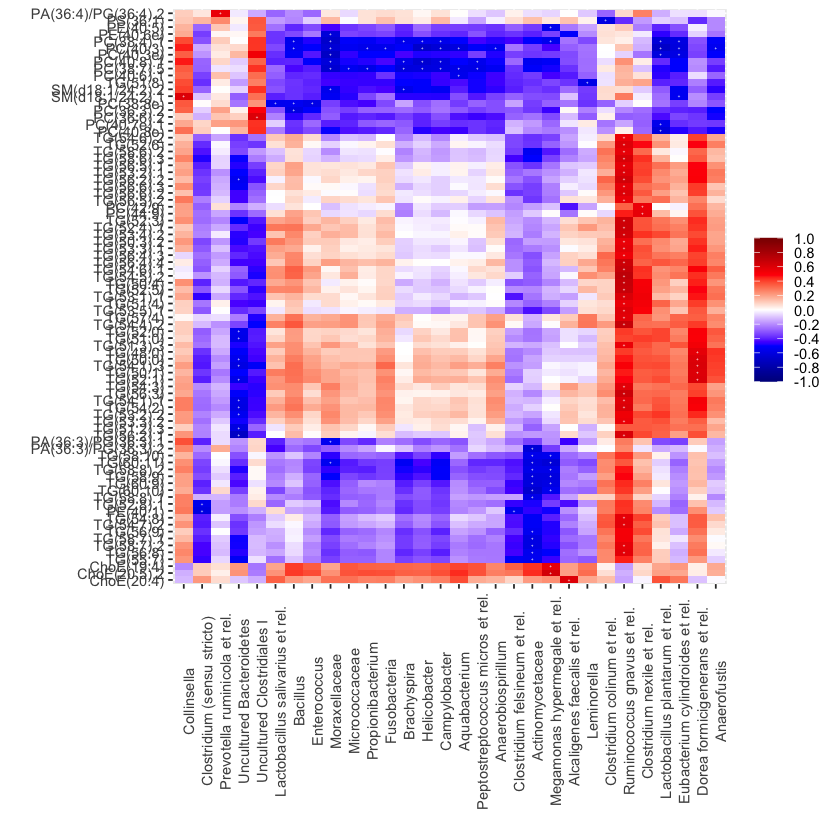

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:dplyr’:

    nasa




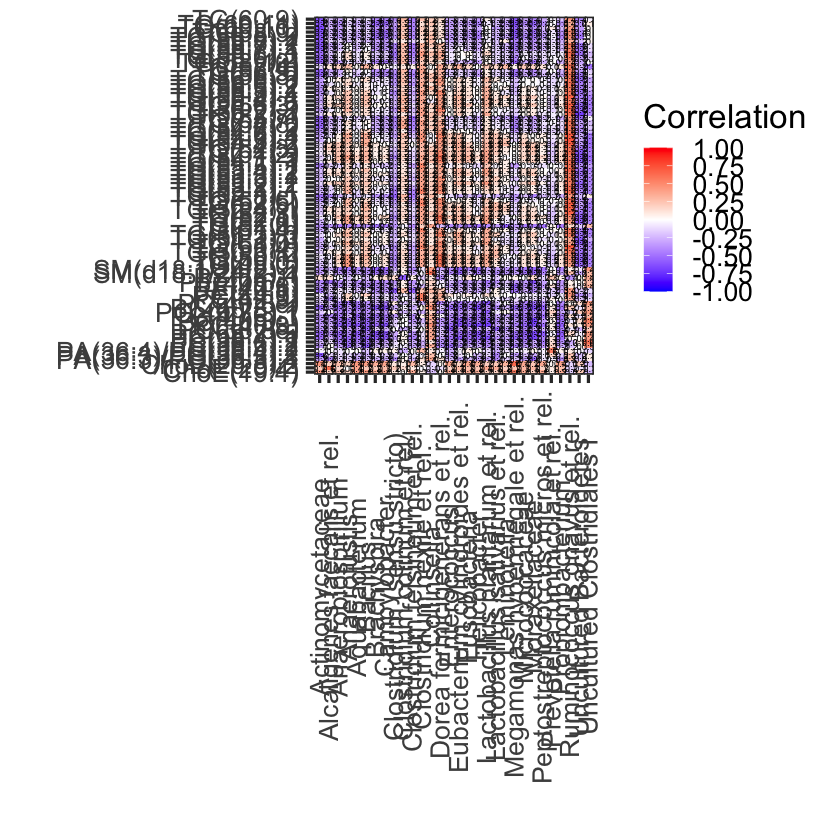

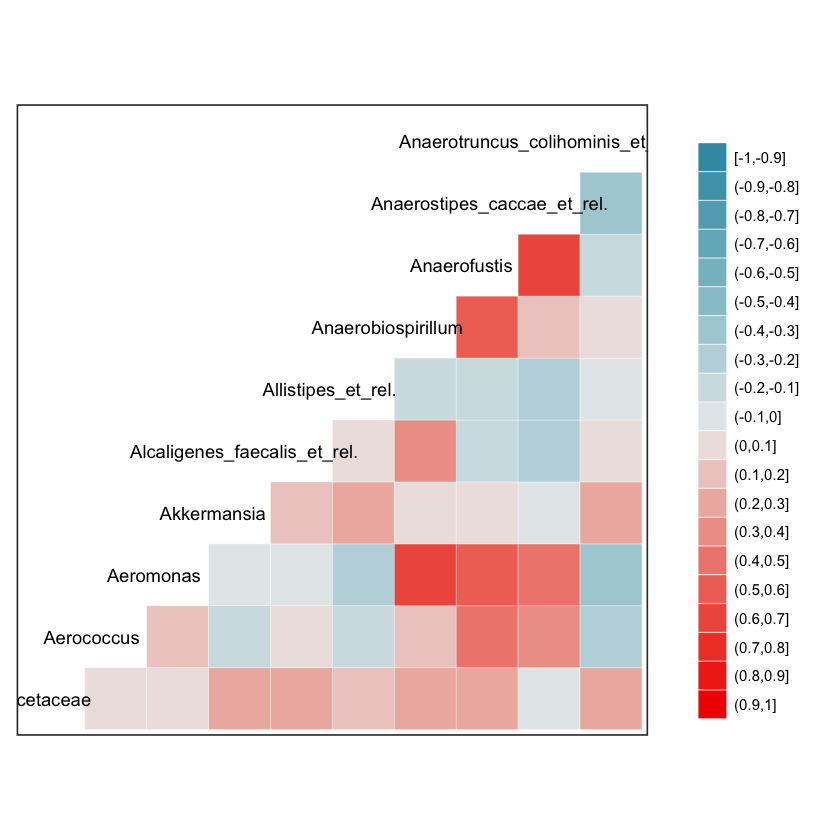

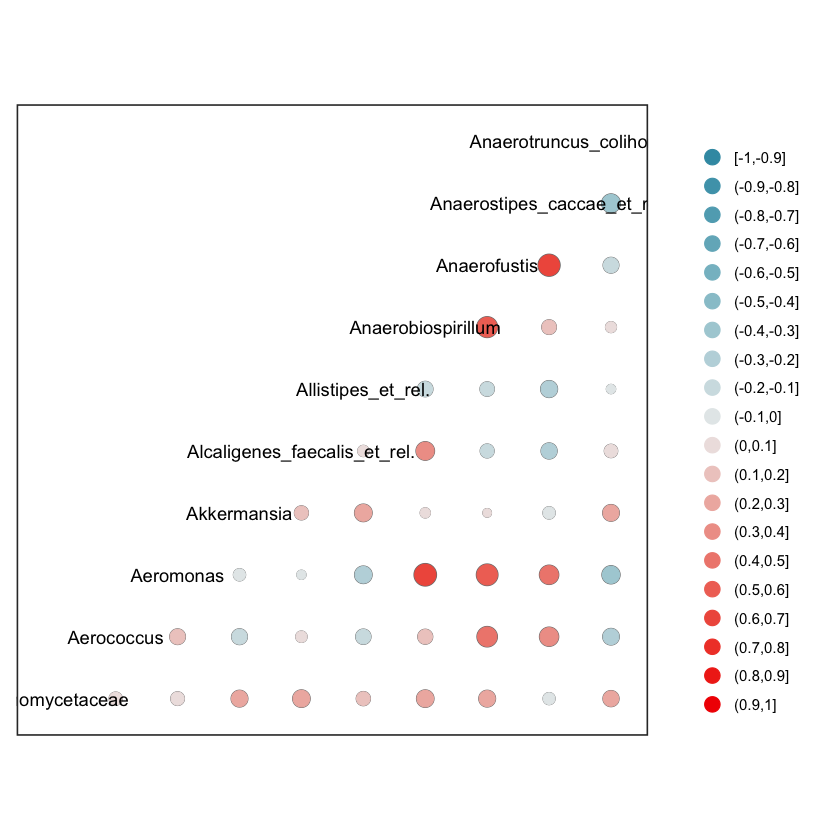

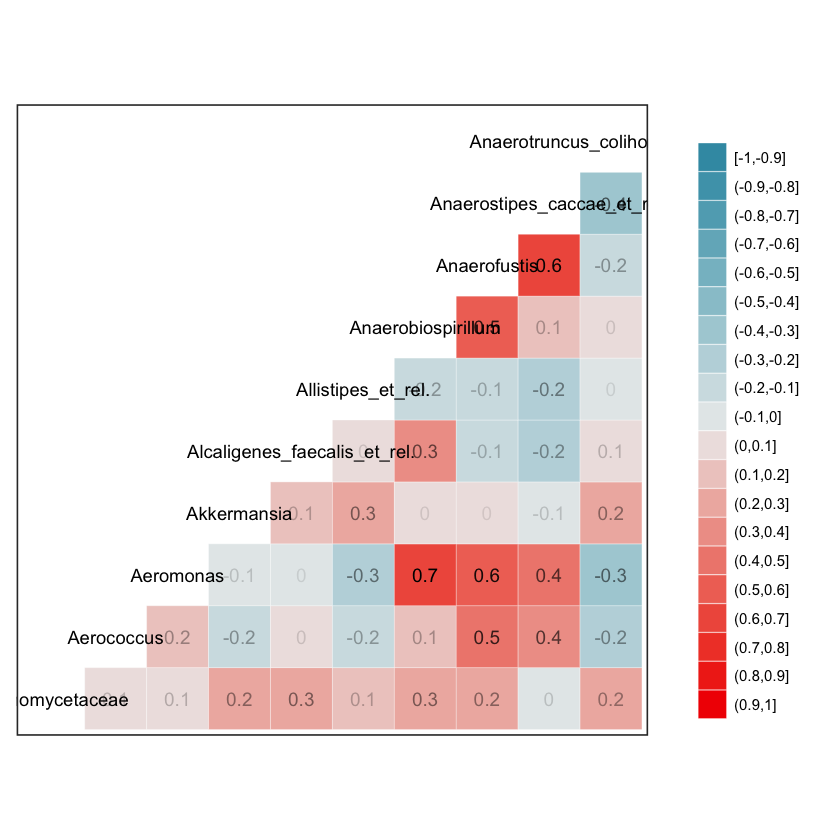

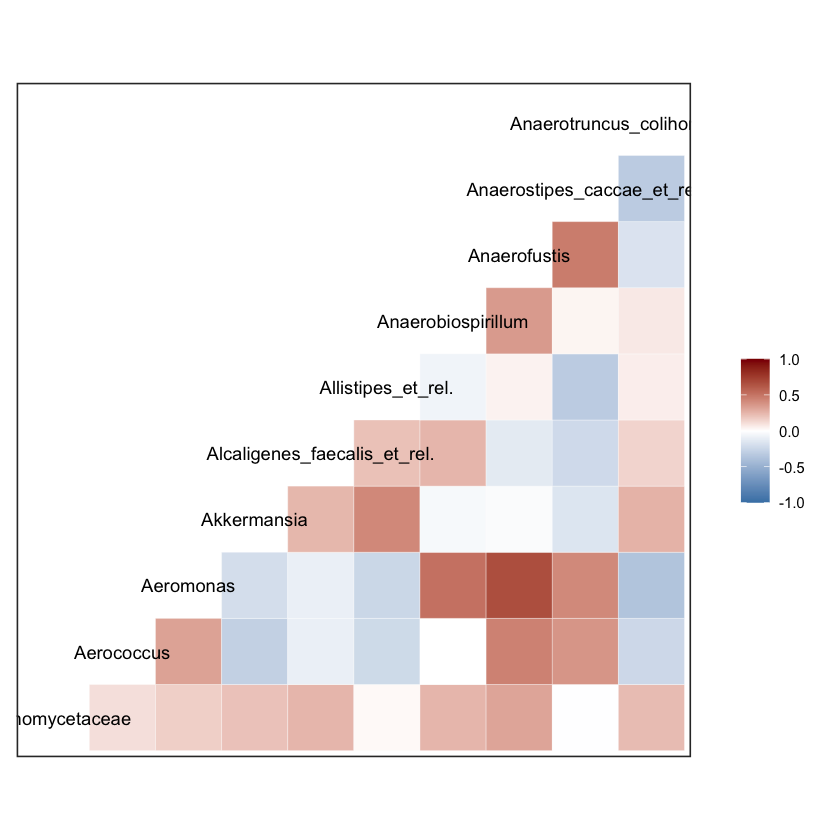

In [14]:
# Normal plot
p <- heat(correlation.table, "X1", "X2", fill = "Correlation", star = "p.adj", p.adj.threshold = 0.05) 

print(p)

# Heatmap with text
theme_set(theme_bw(20))
df <- correlation.table
p <- ggplot(df, aes(X1, X2, group=X2)) 
p <- p + geom_tile(aes(fill = Correlation)) 
p <- p + geom_text(aes(fill = df$Correlation, label = round(df$Correlation, 1)), size = 2) 
p <- p + scale_fill_gradientn("Correlation", 
                      breaks = seq(from = -1, to = 1,  by = 0.25), 
                      colours = c("blue", "white", "red"), 
                  limits = c(-1, 1))
p <- p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) 
p <- p + xlab("") + ylab("")

print(p)

# Heatmap wuth ggcorr
ggcorr(x[, 1:10], method = c("pairwise", "spearman"), nbreaks = 20, hjust = 0.75)
ggcorr(x[, 1:10], method = c("pairwise", "spearman"), nbreaks = 20, geom = "circle")
ggcorr(x[, 1:10], method = c("pairwise", "spearman"), nbreaks = 20, label = TRUE, label_alpha = TRUE)
ggcorr(data = NULL, cor_matrix = cor(x[, 1:10], use = "everything"), low = "steelblue", mid = "white", high = "darkred", midpoint = 0)